# Análise Exploratória

### Objetivo:
A proposta deste pequeno projeto é realizar uma análise exploratória dos top1000 filmes rankeados pelo IMDB.
O dataset foi retirado da plataforma kaggle e pode ser encontrado através do link:
https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Henrique\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Conhecendo o Datset:

* Poster_Link - Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year - Year at which that movie released
* Certificate - Certificate earned by that movie
* Runtime - Total runtime of the movie
* Genre - Genre of the movie
* IMDB_Rating - Rating of the movie at IMDB site
* Overview - mini story/ summary
* Meta_score - Score earned by the movie
* Director - Name of the Director
* Star1,Star2,Star3,Star4 - Name of the Stars
* Noofvotes - Total number of votes
* Gross - Money earned by that movie


In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# transformando Gross em valor numérico
df.Gross = df.Gross.str.replace(',','')
df.Gross = df.Gross.replace(np.nan,0)
df.Gross = df.Gross.astype('int')

In [5]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

### Gráficos

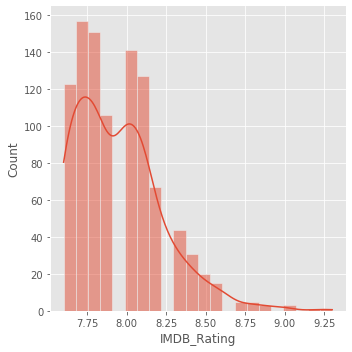

In [6]:
plt.style.use('ggplot')
sns.displot(data = df, x = df.IMDB_Rating, kde=True)
# distribuição por rating IMDB

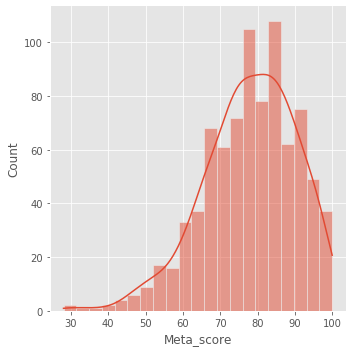

In [7]:
sns.displot(data = df, x = df.Meta_score, kde=True)
# Distribuição por Meta Score

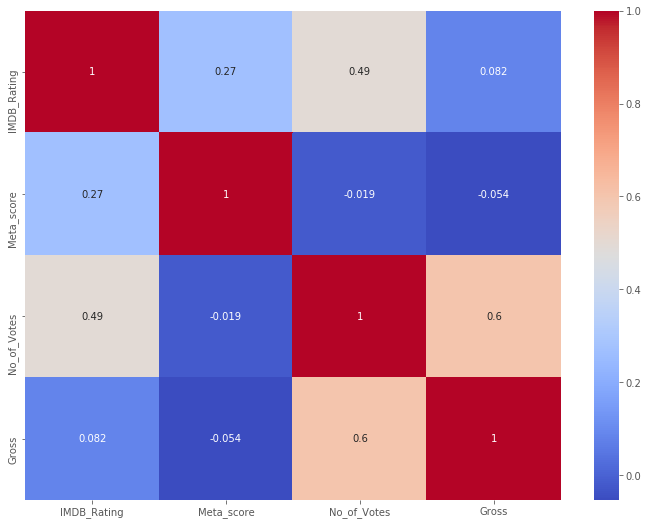

In [8]:
fig, ax = plt.subplots(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
# Procurando correlação entre as variaveis numéricas

In [9]:
top10 = df.sort_values(['IMDB_Rating'], ascending = False)[:10]

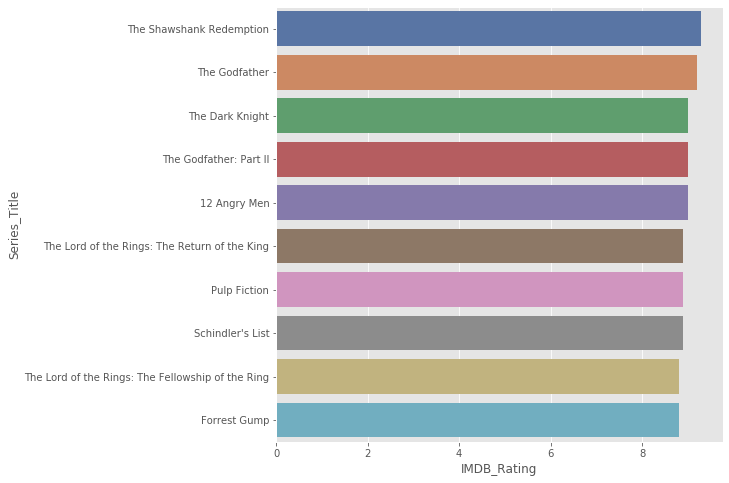

In [29]:
# filmes com o maior rating
fig, ax = plt.subplots(figsize= (8,8))
sns.barplot(data=df, y = top10['Series_Title'],x=top10['IMDB_Rating'], palette='deep')

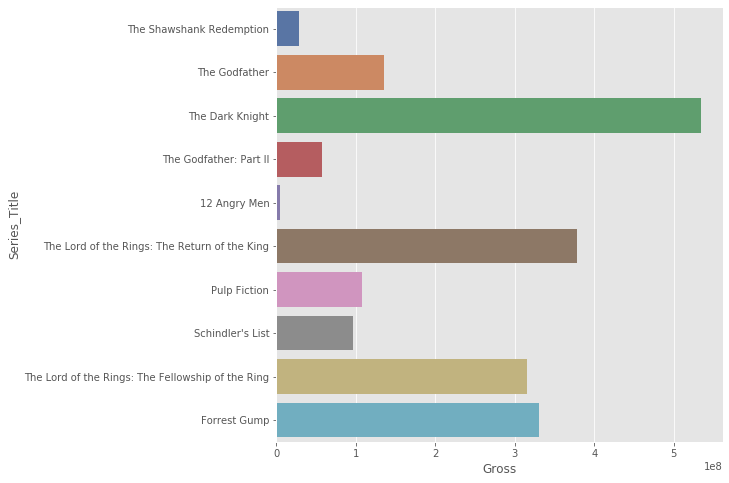

In [30]:
# arrecadação dos filmes com maior rating
fig, ax = plt.subplots(figsize= (8,8))
sns.barplot(data=df, y = top10['Series_Title'],x=top10['Gross'], palette='deep')

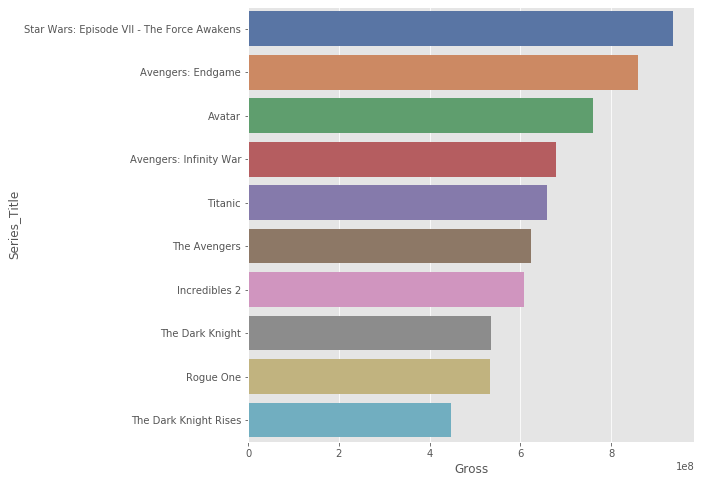

In [28]:
top_gross = df.sort_values('Gross',ascending=False)[:10]

# Filmes com maior arrecadação
fig, ax = plt.subplots(figsize= (8,8))
sns.barplot(data=df,x=top_gross['Gross'], y = top_gross['Series_Title'], palette='deep')

In [14]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = df['Runtime'].astype('int')

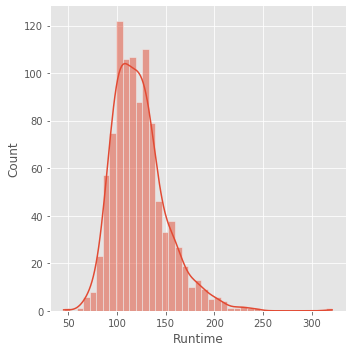

In [15]:
sns.displot(data = df,x = df.Runtime, kde = True)

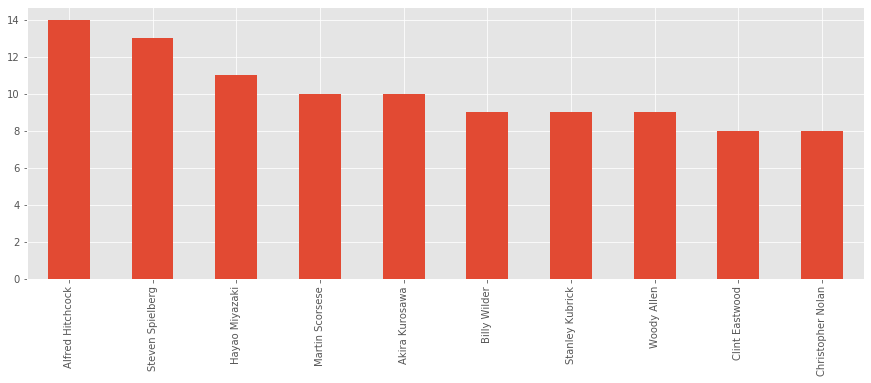

In [34]:
# 10 Diretores com mais filmes na lista
fig, ax = plt.subplots(figsize= (15,5))
df['Director'].value_counts()[:10].plot.bar()

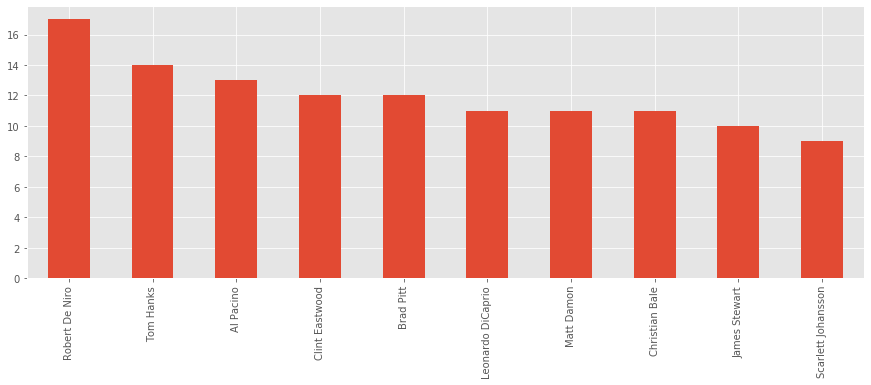

In [16]:
# Atores mais frequentes
top10_star = pd.concat([df['Star1'],df['Star2'],df['Star3'],df['Star4']],axis = 0).value_counts()[:10]
fig, ax = plt.subplots(figsize= (15,5))
top10_star.plot.bar()

In [17]:
generos = []
for i in range(len(df)-1):
    generos = generos + df['Genre'][i].split(', ')

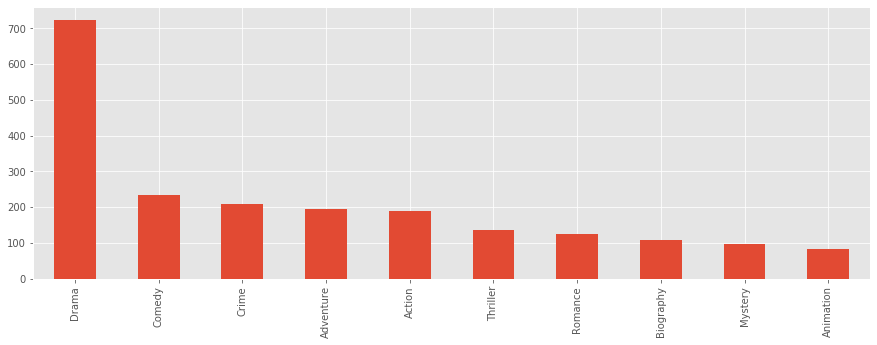

In [18]:
# Principais gêneros
top_genre = (pd.Series(generos).value_counts()[:10])
fig, ax = plt.subplots(figsize= (15,5))
top_genre.plot.bar()